In [1]:
# Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
import emcee
import numpy as np
root = '/home/manvendra/post_doc_ahduni/sim/mod_grav/test_mc'

In [2]:
files = [x for x in os.listdir(root) if x.endswith(".h5")]
read_list = [emcee.backends.HDFBackend(x) for x in files]

In [3]:
samp_list = []
samp_log_prob_list = []
i=0
burn_in_frac = 0.2

for r in read_list:
    s = r.get_chain()
    samp_log_probs = r.get_log_prob()
    
    nrows = s.shape[0]
    burn_in = int(burn_in_frac*nrows)
    
    s = s[burn_in:,:,:]
    samp_log_probs = samp_log_probs[burn_in:,:]
    
    s = np.reshape(s,(s.shape[0]*s.shape[1],s.shape[2]))
    samp_log_probs = np.reshape(samp_log_probs,(samp_log_probs.shape[0]*samp_log_probs.shape[1],))
                                
    samp_list.append(s)
    samp_log_prob_list.append(samp_log_probs)
    
    print(nrows,burn_in)
    if i==0:
        samps = s
    else:
        samps = np.append(samps,s,axis=0)
        
    i=i+1



ndim=3
names = ["Omega_{dm}","B_1","sigma_8"]
labels =  ["\Omega_{dm}","B_1","\sigma_8"]
samples = MCSamples(samples=samp_list,loglikes=samp_log_prob_list,names = names, labels = labels)

100000 20000
100000 20000
100000 20000
100000 20000
100000 20000
100000 20000
100000 20000
Removed no burn in


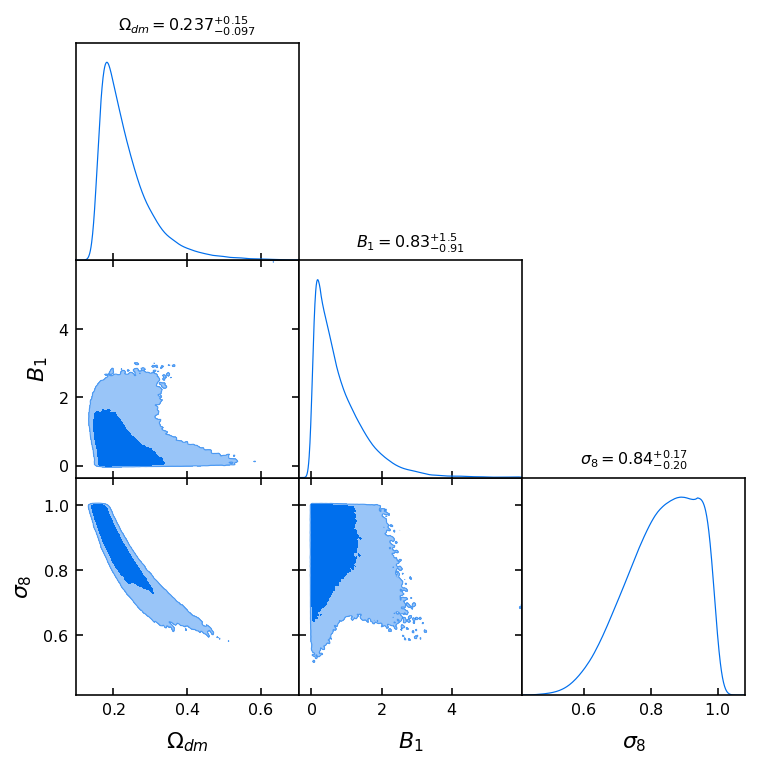

In [4]:
g = plots.get_subplot_plotter()
g.triangle_plot(samples,filled=True,title_limit=2)
g.export("traingle_2lim.pdf")

In [5]:
#samples.getGelmanRubin()
#samples.getGelmanRubinEigenvalues()
samples.getConvergeTests(writeDataToFile=True)

'Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)\n\n             Weight Length   Sample length           N_eff\nOmega_{dm}        1.00E+00            1.00         5600002\nB_1               1.00E+00            1.00         5600077\nsigma_8           1.00E+00            1.00         5600040\n\n\nmean convergence stats using remaining chains\nparam sqrt(var(chain mean)/mean(chain var))\n\nOmega_{dm}     0.0008  \\Omega_{dm}\nB_1            0.0040  B_1\nsigma_8        0.0029  \\sigma_8\n\nvar(mean)/mean(var) for eigenvalues of covariance of y of orthonormalized parameters\n  1     -0.00000\n  2      0.00000\n  3      0.00007\n\nSplit tests: rms_n([delta(upper/lower quantile)]/sd) n={2,3,4}, limit=95%:\ni.e. mean sample splitting change in the quantiles in units of the st. dev.\n\nOmega_{dm}    0.0094   0.0298   0.0925 upper\nOmega_{dm}    0.0003   0.0003   0.0009 lower\nB_1           0.0043   0.0326   0.0970 upper\nB_1           0.0002   0.

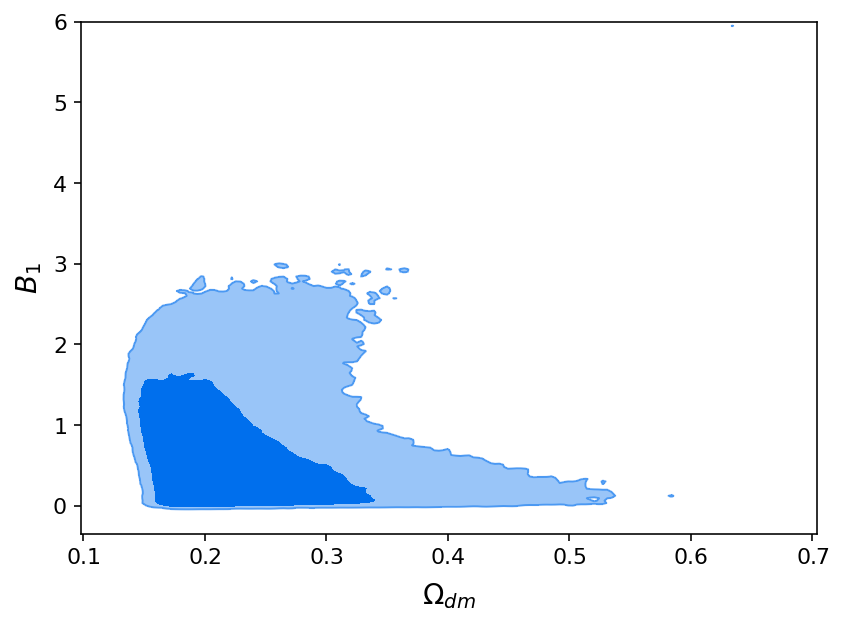

In [6]:
#samples.updateSettings({'contours': [0.68, 0.95, 0.99]})
g = plots.get_single_plotter()
g.plot_2d(samples, 'Omega_{dm}', 'B_1',title_limit=2,filled=True)
g.export("B1_Omega_dm.pdf")

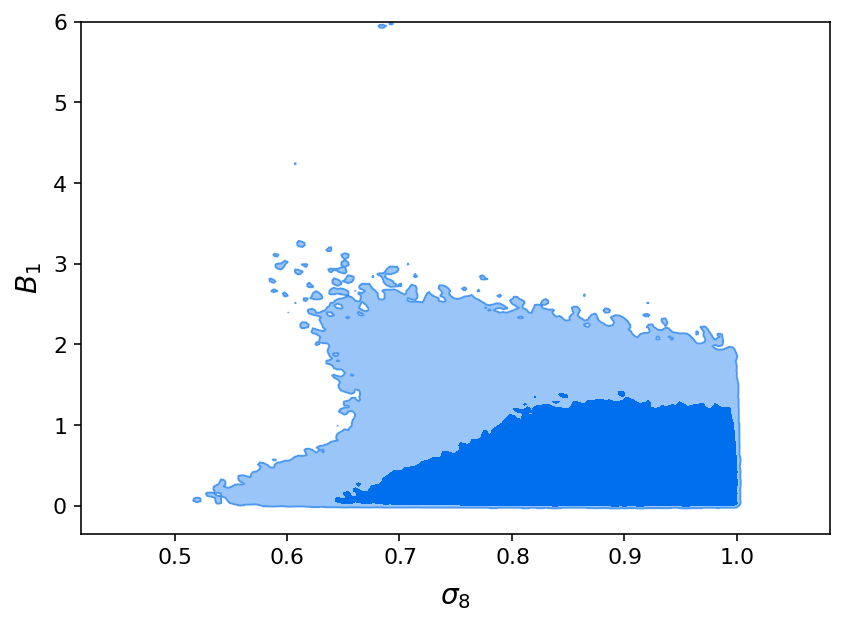

In [7]:
g = plots.get_single_plotter()
g.plot_2d(samples, 'sigma_8', 'B_1', title_limit=2,filled=True)
g.export("B1_sigma8.pdf")

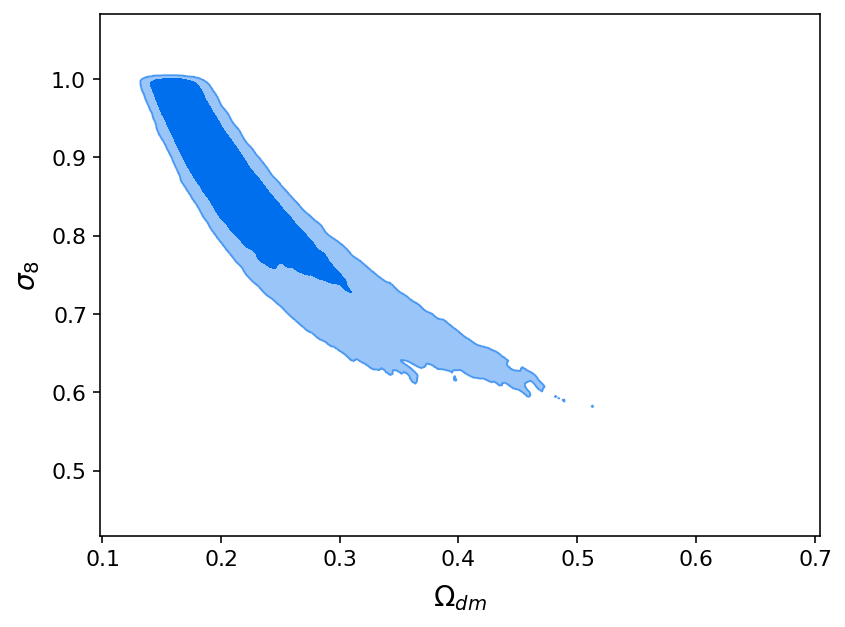

In [8]:
g = plots.get_single_plotter()
g.plot_2d(samples,'Omega_{dm}','sigma_8',title_limit=2, filled=True)
g.export("Omeha_dm_sigma8.pdf")

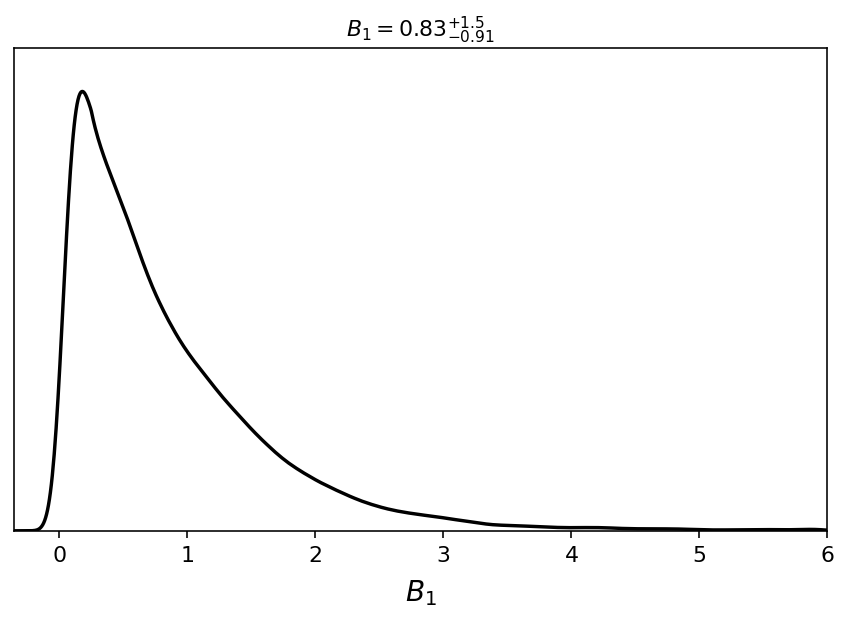

In [9]:
g = plots.get_single_plotter()
g.plot_1d(samples,'B_1',title_limit=2)
g.export("B1.pdf")

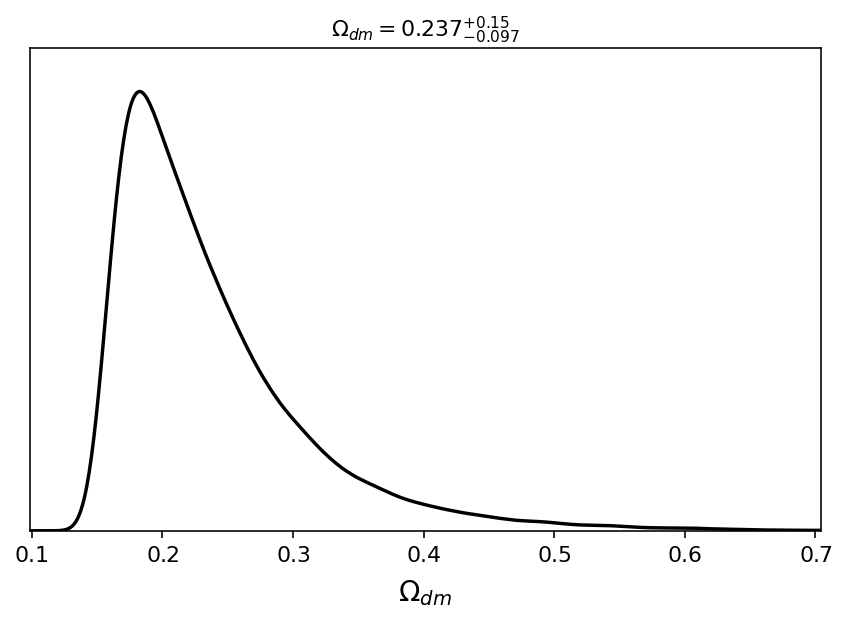

In [10]:
g = plots.get_single_plotter()
g.plot_1d(samples,'Omega_{dm}',title_limit=2)
g.export("Omega_dm.pdf")

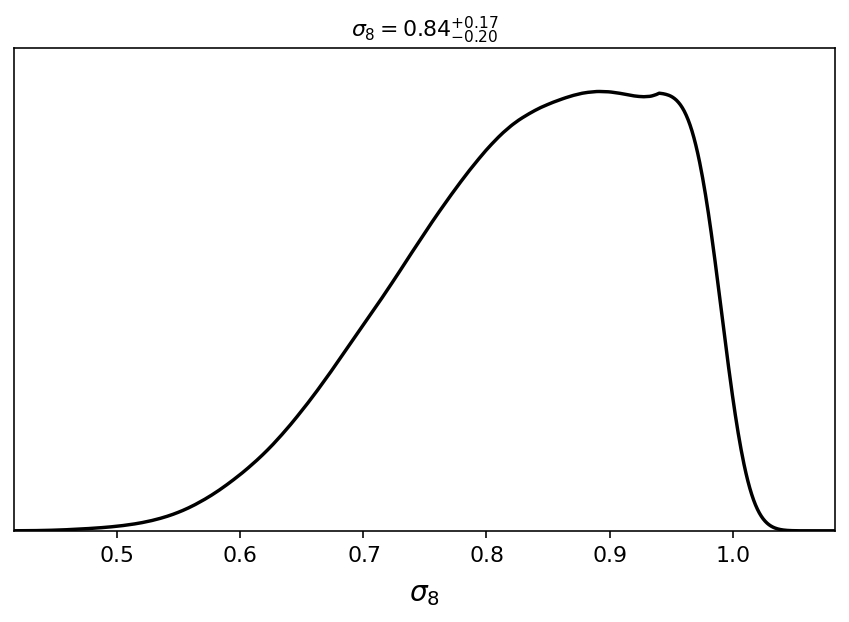

In [11]:
g = plots.get_single_plotter()
g.plot_1d(samples,'sigma_8',title_limit=2)
g.export("sigma_8.pdf")